# Digits MNINST Classification


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


## 1. Load MNIST


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# These are all pandas DataFrames
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

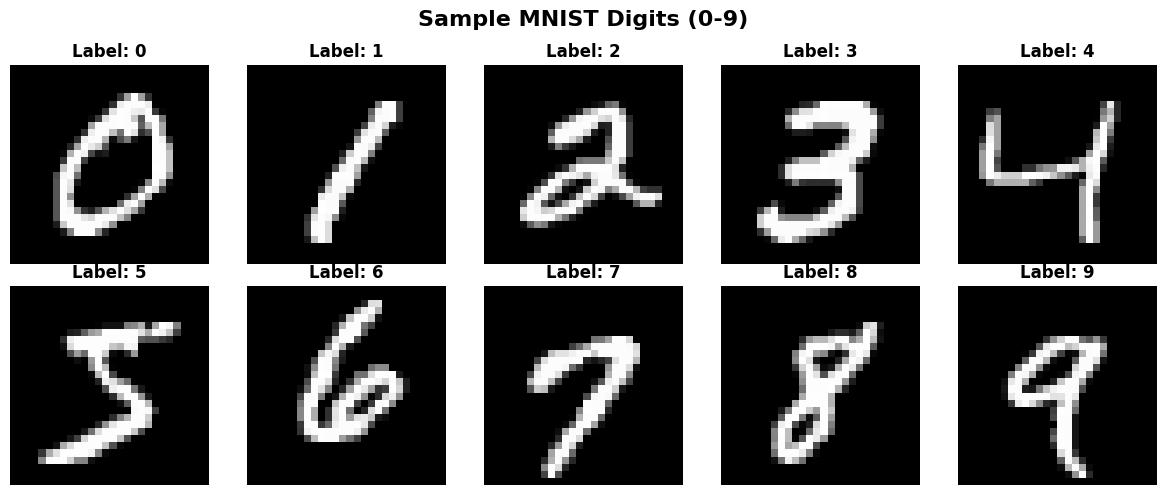

In [3]:
# Display a grid of sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits (0-9)', fontsize=16, fontweight='bold')

# Show one example of each digit (0-9)
for digit in range(10):
    # Find the first occurrence of each digit
    idx = None
    for i in range(len(y_train)):
        if y_train[i] == digit:
            idx = i
            break
    
    if idx is not None:
        row = digit // 5
        col = digit % 5
        axes[row, col].imshow(x_train[idx], cmap='gray')
        axes[row, col].set_title(f'Label: {digit}', fontsize=12, fontweight='bold')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [5]:
print("Train after reshape:", x_train.shape)
print("Test after reshape:", x_test.shape)

Train after reshape: (60000, 784)
Test after reshape: (10000, 784)


## 2. Build a MLP


Below is a simple diagram of the MLP we build in the next cell. Each arrow represents a fully connected layer.

```mermaid
flowchart LR
    I([Input 28x28 = 784]) --> D1[Dense 128 + ReLU]
    D1 --> D2[Dense 64 + ReLU]
    D2 --> O[Dense 10 + Softmax]
```

If your Jupyter environment does not render Mermaid, read it left-to-right as:
`Input(784) → Dense(128, ReLU) → Dense(64, ReLU) → Dense(10, Softmax)`


In [6]:
def build_mlp(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28 * 28,)),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(10, activation="softmax"),
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## 3. Training a NN


In [7]:
model_relu = build_mlp("relu")
model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Track training time
start_time = time.time()
history_relu = model_relu.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs=15,  # Increased from 5 to allow model to converge
    batch_size=128,
    verbose=2,
)
training_time = time.time() - start_time

Epoch 1/15
422/422 - 1s - 2ms/step - accuracy: 0.9027 - loss: 0.3466 - val_accuracy: 0.9603 - val_loss: 0.1422
Epoch 2/15
422/422 - 0s - 1ms/step - accuracy: 0.9568 - loss: 0.1462 - val_accuracy: 0.9685 - val_loss: 0.1085
Epoch 3/15
422/422 - 1s - 1ms/step - accuracy: 0.9694 - loss: 0.1022 - val_accuracy: 0.9722 - val_loss: 0.1009
Epoch 4/15
422/422 - 1s - 1ms/step - accuracy: 0.9766 - loss: 0.0761 - val_accuracy: 0.9733 - val_loss: 0.0889
Epoch 5/15
422/422 - 1s - 1ms/step - accuracy: 0.9816 - loss: 0.0595 - val_accuracy: 0.9760 - val_loss: 0.0872
Epoch 6/15
422/422 - 1s - 1ms/step - accuracy: 0.9845 - loss: 0.0487 - val_accuracy: 0.9775 - val_loss: 0.0769
Epoch 7/15
422/422 - 5s - 12ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9773 - val_loss: 0.0828
Epoch 8/15
422/422 - 2s - 4ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.9762 - val_loss: 0.0831
Epoch 9/15
422/422 - 1s - 1ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9788 - val_loss: 0.0839


## 4. Visualize training


In [9]:
# Helper function to get and format parameter count
def get_param_count(model):
    """Calculate and return total trainable parameters in a model."""
    total_params = model.count_params()
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = total_params - trainable_params
    
    # Format for readability
    if total_params >= 1_000_000:
        total_str = f"{total_params/1_000_000:.2f}M"
    elif total_params >= 1_000:
        total_str = f"{total_params/1_000:.2f}K"
    else:
        total_str = str(total_params)
    
    return total_params, trainable_params, non_trainable_params, total_str

# Custom callback to evaluate on test set after each epoch
class TestSetEvaluationCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_loss = []
        self.test_accuracy = []
    
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(
            self.test_data[0], self.test_data[1], 
            verbose=0
        )
        self.test_loss.append(test_loss)
        self.test_accuracy.append(test_acc)
        print(f"  Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

In [10]:
activations = ["relu", "tanh", "sigmoid"]
results = {}
histories = {}
test_callbacks = {}
training_times = {}
eval_times = {}
param_counts = {}

for act in activations:
    model = build_mlp(act)
    
    # Get parameter count (all models have same architecture, so same param count)
    total_params, trainable_params, non_trainable_params, total_str = get_param_count(model)
    param_counts[act] = {'total': total_params, 'formatted': total_str}
    
    # Create callback to track test set performance after each epoch
    test_callback = TestSetEvaluationCallback((x_test, y_test))
    
    # Track training time
    start_time = time.time()
    history = model.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=15,  # Increased from 5 to allow models to converge
        batch_size=128,
        verbose=0,
        callbacks=[test_callback],
    )
    train_time = time.time() - start_time
    
    # Track evaluation time
    eval_start = time.time()
    test_loss_act, acc = model.evaluate(x_test, y_test, verbose=0)
    eval_time = time.time() - eval_start
    
    results[act] = {'accuracy': acc, 'loss': test_loss_act}
    histories[act] = history
    test_callbacks[act] = test_callback
    training_times[act] = train_time
    eval_times[act] = eval_time

print("Activation Function Comparison:")
print("="*60)
print(f"Model Architecture: 784 → 128 → 64 → 10")
print(f"Total Parameters:   {param_counts[activations[0]]['total']:,} ({param_counts[activations[0]]['formatted']})")
print(f"Parameters/sample:   {param_counts[activations[0]]['total']/len(x_train):.2f}")
print("-"*60)
for act in activations:
    print(f"{act:7s} test accuracy: {results[act]['accuracy']:.4f} | "
          f"test loss: {results[act]['loss']:.4f} | "
          f"train time: {training_times[act]:.2f}s")
print("="*60)

  Test accuracy: 0.9536, Test loss: 0.1640
  Test accuracy: 0.9674, Test loss: 0.1151
  Test accuracy: 0.9681, Test loss: 0.1069
  Test accuracy: 0.9739, Test loss: 0.0914
  Test accuracy: 0.9755, Test loss: 0.0831
  Test accuracy: 0.9760, Test loss: 0.0794
  Test accuracy: 0.9765, Test loss: 0.0786
  Test accuracy: 0.9757, Test loss: 0.0827
  Test accuracy: 0.9755, Test loss: 0.0850
  Test accuracy: 0.9776, Test loss: 0.0834
  Test accuracy: 0.9784, Test loss: 0.0806
  Test accuracy: 0.9778, Test loss: 0.0812
  Test accuracy: 0.9752, Test loss: 0.0970
  Test accuracy: 0.9756, Test loss: 0.0929
  Test accuracy: 0.9737, Test loss: 0.1082
  Test accuracy: 0.9423, Test loss: 0.1960
  Test accuracy: 0.9565, Test loss: 0.1446
  Test accuracy: 0.9635, Test loss: 0.1181
  Test accuracy: 0.9710, Test loss: 0.0967
  Test accuracy: 0.9692, Test loss: 0.0976
  Test accuracy: 0.9741, Test loss: 0.0837
  Test accuracy: 0.9762, Test loss: 0.0792
  Test accuracy: 0.9754, Test loss: 0.0778
  Test accu

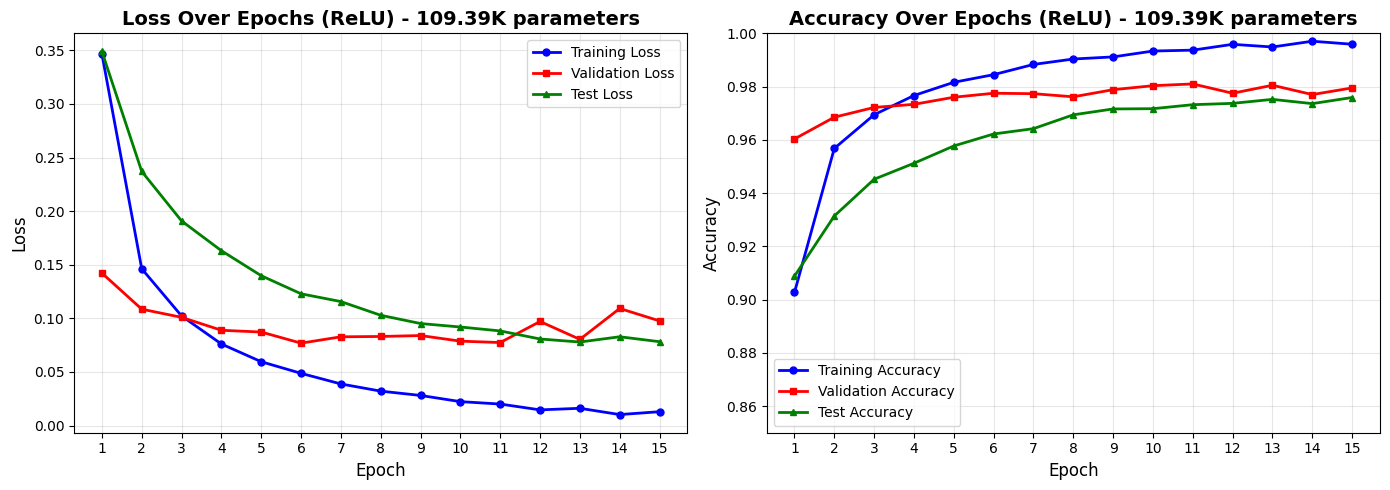


TRAINING SUMMARY
Model Parameters:      109,386 (109.39K)
Parameters/sample:     1.82

Final Training Loss:   0.0129
Final Validation Loss: 0.0976
Final Test Loss:       0.0782

Final Training Accuracy:   0.9959
Final Validation Accuracy: 0.9795
Final Test Accuracy:       0.9759

Training Time:    14.32s (0.24 min)
Evaluation Time:  0.14s
Total Time:       14.47s (0.24 min)


In [11]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, len(history_relu.history['loss']) + 1)

# Get parameter count for display in plots
total_params, trainable_params, non_trainable_params, total_str = get_param_count(model_relu)

# Plot 1: Loss over epochs
axes[0].plot(epochs, history_relu.history['loss'], 'b-o', label='Training Loss', linewidth=2, markersize=5)
axes[0].plot(epochs, history_relu.history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=5)
axes[0].plot(epochs, test_callback.test_loss, 'g-^', label='Test Loss', linewidth=2, markersize=5)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
# Add parameter count to title
title_with_params = f'Loss Over Epochs (ReLU) - {total_str} parameters'
axes[0].set_title(title_with_params, fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(epochs)

# Plot 2: Accuracy over epochs
axes[1].plot(epochs, history_relu.history['accuracy'], 'b-o', label='Training Accuracy', linewidth=2, markersize=5)
axes[1].plot(epochs, history_relu.history['val_accuracy'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=5)
axes[1].plot(epochs, test_callback.test_accuracy, 'g-^', label='Test Accuracy', linewidth=2, markersize=5)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
# Add parameter count to title
title_with_params = f'Accuracy Over Epochs (ReLU) - {total_str} parameters'
axes[1].set_title(title_with_params, fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(epochs)
axes[1].set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

# Get parameter count for display (already calculated above for plot titles)

# Print summary statistics
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Model Parameters:      {total_params:,} ({total_str})")
print(f"Parameters/sample:     {total_params/len(x_train):.2f}")
print(f"\nFinal Training Loss:   {history_relu.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history_relu.history['val_loss'][-1]:.4f}")
print(f"Final Test Loss:       {test_callback.test_loss[-1]:.4f}")
print(f"\nFinal Training Accuracy:   {history_relu.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"Final Test Accuracy:       {test_callback.test_accuracy[-1]:.4f}")
print(f"\nTraining Time:    {training_time:.2f}s ({training_time/60:.2f} min)")
print(f"Evaluation Time:  {eval_time:.2f}s")
print(f"Total Time:       {training_time + eval_time:.2f}s ({(training_time + eval_time)/60:.2f} min)")
print("="*60)

## 5. Using the Trained Model for Inference

Now that we have a trained model, let's use it to make predictions on new data. We'll demonstrate:

1. How to make predictions on individual samples
2. How to interpret the model's output
3. Visualize the input images and predictions


In [12]:
import numpy as np

# Select a few random samples from the test set
num_examples = 10
random_indices = np.random.choice(len(x_test), num_examples, replace=False)

# Get the samples and their true labels
sample_images = x_test[random_indices]
true_labels = y_test[random_indices]

# Make predictions
predictions = model_relu.predict(sample_images, verbose=0)

# Get the predicted class (the one with highest probability)
predicted_labels = np.argmax(predictions, axis=1)

print("Inference Examples:")
print("="*60)
for i in range(num_examples):
    print(f"Sample {i+1}:")
    print(f"  True Label:      {true_labels[i]}")
    print(f"  Predicted Label: {predicted_labels[i]}")
    print(f"  Confidence:      {predictions[i][predicted_labels[i]]:.4f} ({predictions[i][predicted_labels[i]]*100:.2f}%)")
    print(f"  Correct:         {'✓' if true_labels[i] == predicted_labels[i] else '✗'}")
    print("-"*60)

Inference Examples:
Sample 1:
  True Label:      1
  Predicted Label: 1
  Confidence:      1.0000 (100.00%)
  Correct:         ✓
------------------------------------------------------------
Sample 2:
  True Label:      4
  Predicted Label: 4
  Confidence:      1.0000 (100.00%)
  Correct:         ✓
------------------------------------------------------------
Sample 3:
  True Label:      6
  Predicted Label: 6
  Confidence:      1.0000 (100.00%)
  Correct:         ✓
------------------------------------------------------------
Sample 4:
  True Label:      1
  Predicted Label: 1
  Confidence:      0.9998 (99.98%)
  Correct:         ✓
------------------------------------------------------------
Sample 5:
  True Label:      1
  Predicted Label: 1
  Confidence:      1.0000 (100.00%)
  Correct:         ✓
------------------------------------------------------------
Sample 6:
  True Label:      6
  Predicted Label: 6
  Confidence:      1.0000 (100.00%)
  Correct:         ✓
----------------------

### Visualizing Predictions

Let's visualize the input images along with their predictions and confidence scores.


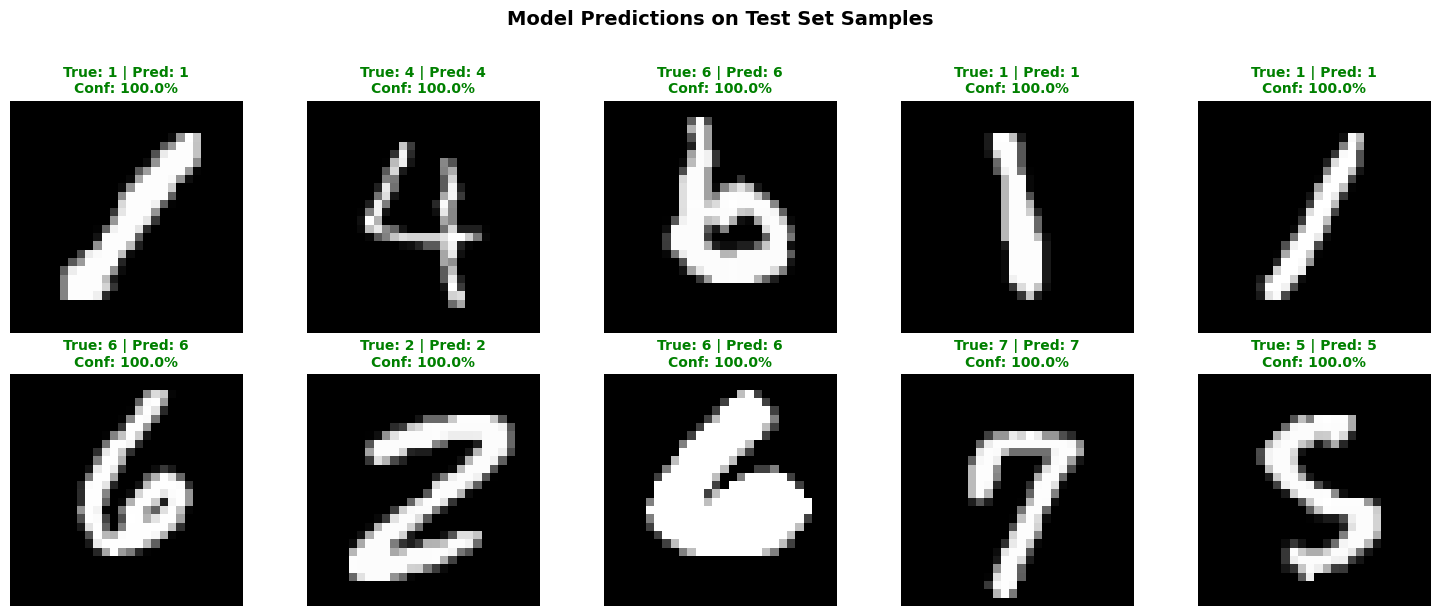

In [13]:
# Visualize the predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(num_examples):
    # Reshape the flattened image back to 28x28 for visualization
    img = sample_images[i].reshape(28, 28)
    
    # Display the image
    axes[i].imshow(img, cmap='gray')
    
    # Set title with prediction info
    is_correct = true_labels[i] == predicted_labels[i]
    color = 'green' if is_correct else 'red'
    confidence = predictions[i][predicted_labels[i]] * 100
    
    title = f"True: {true_labels[i]} | Pred: {predicted_labels[i]}\nConf: {confidence:.1f}%"
    axes[i].set_title(title, fontsize=10, color=color, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Model Predictions on Test Set Samples', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Understanding Prediction Probabilities

The model outputs a probability distribution over all 10 digit classes. Let's visualize this for a few examples.


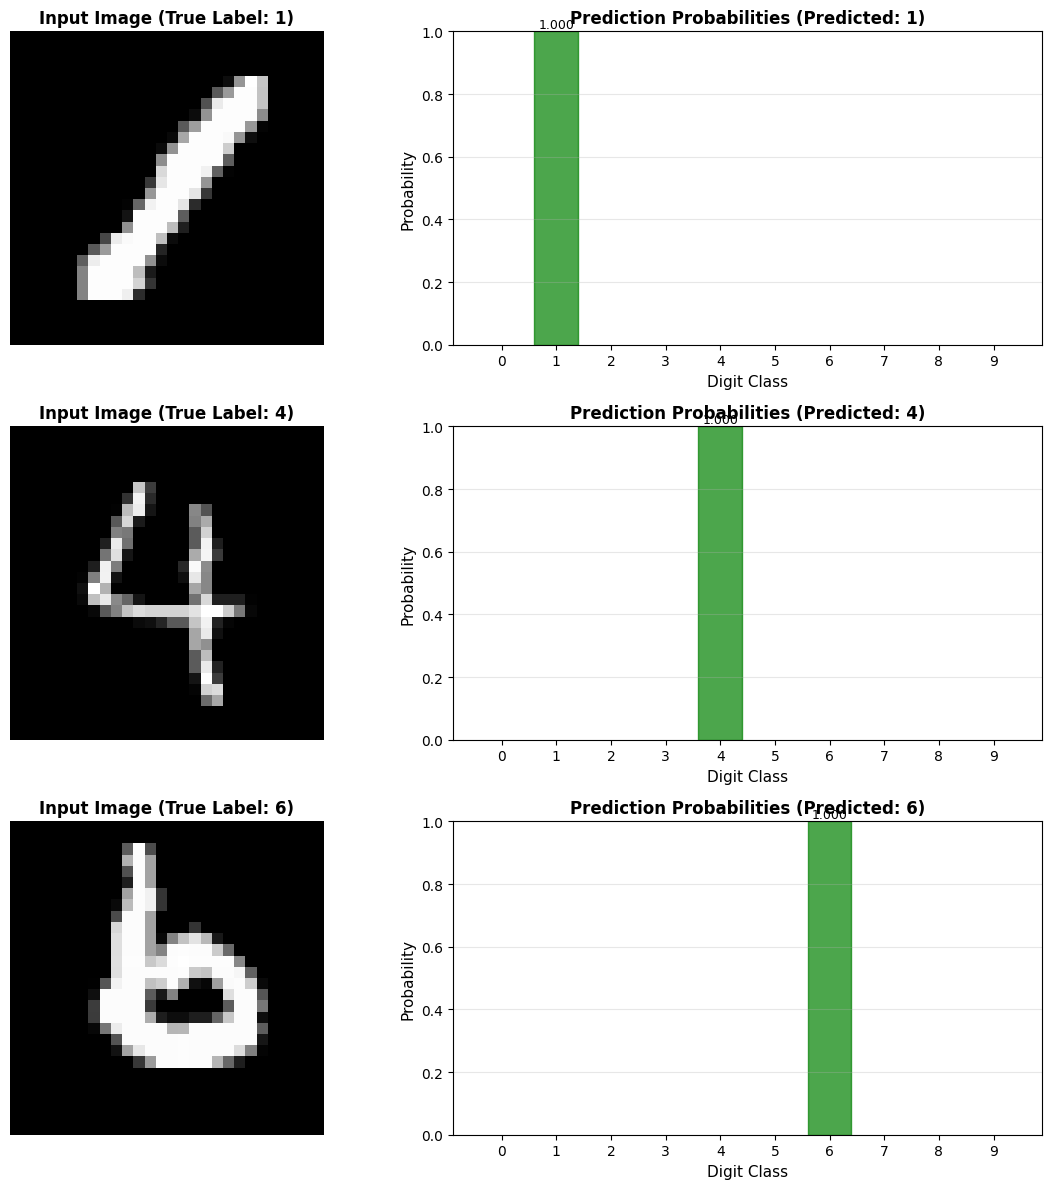

In [14]:
# Show detailed probability distributions for 3 examples
num_detailed = 3
fig, axes = plt.subplots(num_detailed, 2, figsize=(12, 4*num_detailed))

for i in range(num_detailed):
    # Show the image
    img = sample_images[i].reshape(28, 28)
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f'Input Image (True Label: {true_labels[i]})', fontsize=12, fontweight='bold')
    axes[i, 0].axis('off')
    
    # Show the probability distribution
    bars = axes[i, 1].bar(range(10), predictions[i], color='steelblue', alpha=0.7)
    
    # Highlight the predicted class
    bars[predicted_labels[i]].set_color('green' if true_labels[i] == predicted_labels[i] else 'red')
    
    axes[i, 1].set_xlabel('Digit Class', fontsize=11)
    axes[i, 1].set_ylabel('Probability', fontsize=11)
    axes[i, 1].set_title(f'Prediction Probabilities (Predicted: {predicted_labels[i]})', fontsize=12, fontweight='bold')
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_ylim([0, 1])
    axes[i, 1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0.05:  # Only show labels for significant probabilities
            axes[i, 1].text(bar.get_x() + bar.get_width()/2., height,
                          f'{height:.3f}',
                          ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Batch Inference

In practice, you often want to make predictions on multiple samples at once. Here's how to do batch inference efficiently.


In [15]:
# Batch inference on a larger set
batch_size = 100
batch_indices = np.random.choice(len(x_test), batch_size, replace=False)
batch_images = x_test[batch_indices]
batch_true_labels = y_test[batch_indices]

# Time the batch prediction
import time
start_time = time.time()
batch_predictions = model_relu.predict(batch_images, verbose=0)
inference_time = time.time() - start_time

batch_predicted_labels = np.argmax(batch_predictions, axis=1)
batch_accuracy = np.mean(batch_predicted_labels == batch_true_labels)

print("Batch Inference Results:")
print("="*60)
print(f"Batch Size:           {batch_size}")
print(f"Total Inference Time: {inference_time:.4f}s")
print(f"Time per Sample:      {inference_time/batch_size*1000:.2f}ms")
print(f"Batch Accuracy:       {batch_accuracy:.4f} ({batch_accuracy*100:.2f}%)")
print(f"Correct Predictions:  {np.sum(batch_predicted_labels == batch_true_labels)}/{batch_size}")
print("="*60)

Batch Inference Results:
Batch Size:           100
Total Inference Time: 0.0494s
Time per Sample:      0.49ms
Batch Accuracy:       0.9500 (95.00%)
Correct Predictions:  95/100


### Key Takeaways for Inference

1. **Model Output**: The model outputs a probability distribution over all 10 classes (digits 0-9)
2. **Prediction**: The predicted class is the one with the highest probability
3. **Confidence**: The probability value indicates how confident the model is in its prediction
4. **Batch Processing**: For efficiency, process multiple samples at once using batch inference
5. **Input Format**: Remember to preprocess new data the same way as training data (normalize and flatten)
